In [1]:
import shap
import pickle
import pandas as pd

In [2]:
with open("S01_shap_calc.pkl", "rb") as f:
    data = pickle.load(f)
    shaps = data["shaps"]
    infos = data["infos"]

In [3]:
pd.DataFrame.from_dict(infos)

,model,model_params,test_size,random_state
0,DTR,"{'criterion': 'friedman_mse', 'splitter': 'bes...",0.3,1
1,EN,"{'alpha': 5.5641802254313645e-05, 'l1_ratio': ...",0.3,5
2,GBR,"{'n_estimators': 76, 'learning_rate': 0.001648...",0.3,4
3,KNR,"{'n_neighbors': 19, 'weights': 'uniform', 'alg...",0.3,4
4,RFR,"{'n_estimators': 118, 'max_depth': 106, 'min_s...",0.3,4
5,SVR,"{'kernel': 'linear', 'C': 7.451156502282094e-0...",0.3,4
6,XGBR,"{'n_estimators': 118, 'max_depth': 12, 'learni...",0.3,4


In [4]:
idx = 6
shap_values = shaps[idx]["shap_values"]
model = shaps[idx]["model"]

print(f"Model: {model}")

Model: XGBR


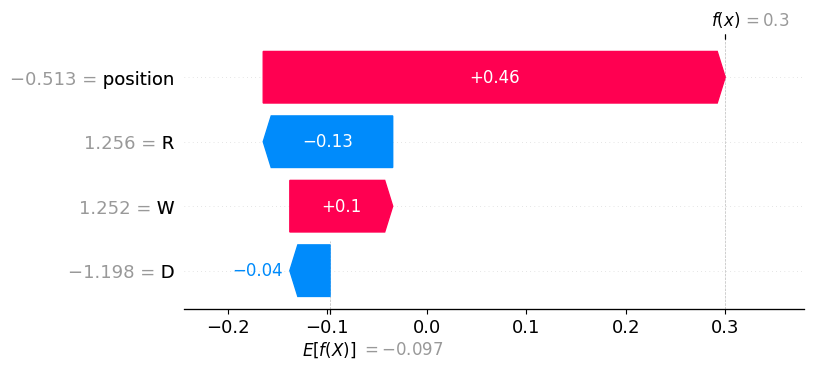

In [5]:
# Plot SHAP values for the first instance
shap.plots.waterfall(shap_values[0])

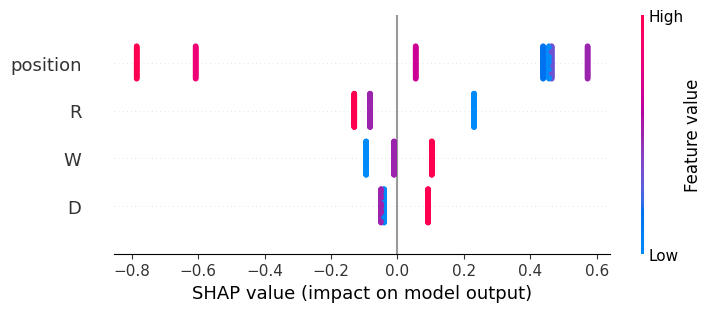

In [6]:
# Plot SHAP summary plot
shap.plots.beeswarm(shap_values)

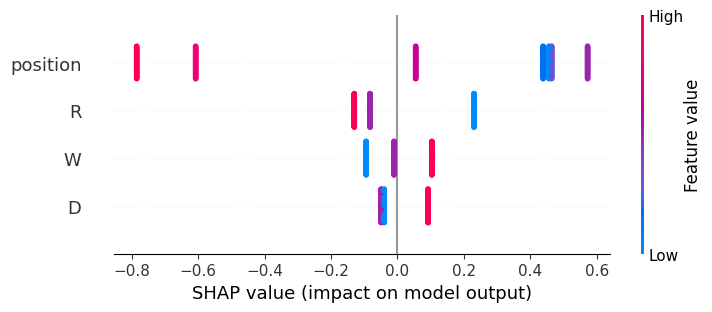

In [7]:
# Plot SHAP summary plot with features ordered by importance
shap.plots.beeswarm(shap_values, order=shap_values.abs.max(0))

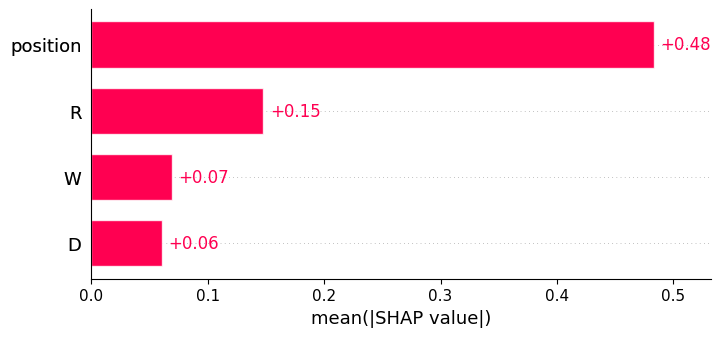

In [8]:
# Plot SHAP bar plot
shap.plots.bar(shap_values)

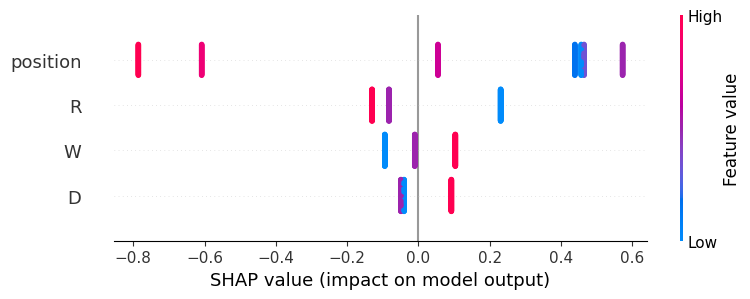

In [9]:
# Plot SHAP summary plot with feature names
shap.summary_plot(shap_values)

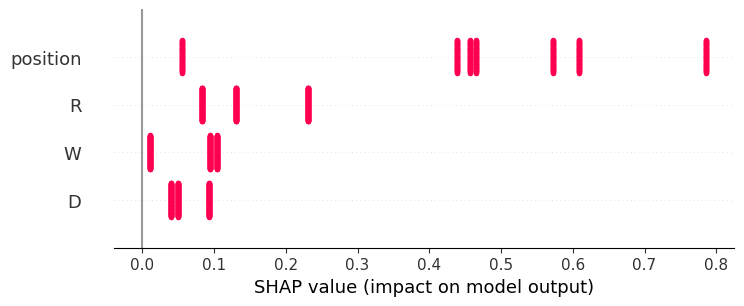

In [10]:
shap.plots.beeswarm(shap_values.abs, color="shap_red")

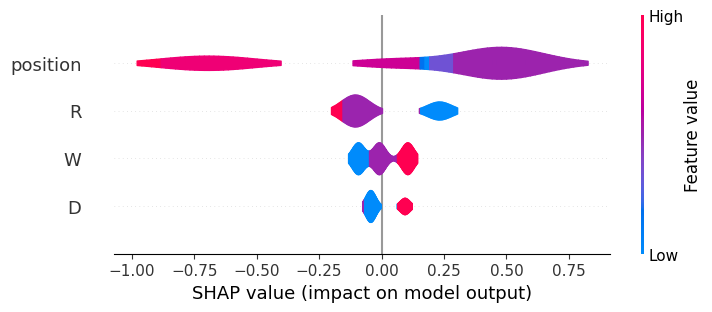

In [11]:
shap.plots.violin(shap_values)

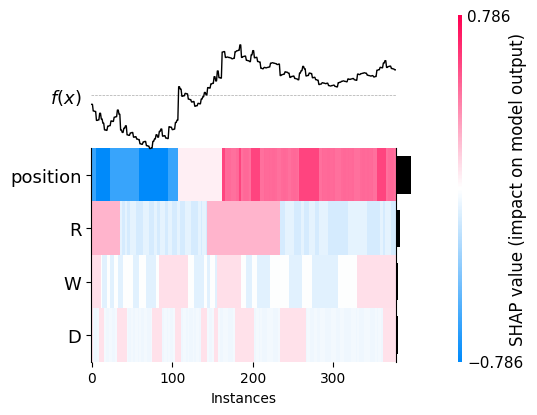

<Axes: xlabel='Instances'>

In [12]:
shap.plots.heatmap(shap_values)

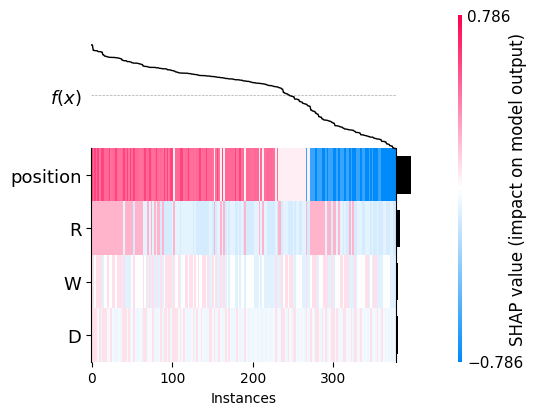

<Axes: xlabel='Instances'>

In [13]:
shap.plots.heatmap(shap_values, instance_order=shap_values.sum(1))

In [14]:
import numpy as np

feature_names = shap_values.feature_names
shap_df = pd.DataFrame(shap_values.values, columns=feature_names)
vals = np.abs(shap_df.values).mean(0)
shap_importance = pd.DataFrame(list(zip(feature_names, vals)), columns=['col_name', 'feature_importance_vals'])
shap_importance.sort_values(by=['feature_importance_vals'], ascending=False, inplace=True)
shap_importance

,col_name,feature_importance_vals
0,position,0.482946
1,R,0.147802
2,W,0.069391
3,D,0.060646


In [15]:
ranking = shap_importance.rename(columns={"col_name": "feature", "feature_importance_vals": "value"})
ranking["measure"] = "SHAP_importance"
ranking["rank"] = np.arange(1, len(ranking) + 1)
ranking

,feature,value,measure,rank
0,position,0.482946,SHAP_importance,1
1,R,0.147802,SHAP_importance,2
2,W,0.069391,SHAP_importance,3
3,D,0.060646,SHAP_importance,4


In [16]:
ranking.to_excel("S02.xlsx", index=False)